In [2]:
import warnings
from trainer import *
from models import *
from datamodule import MyDataset
warnings.filterwarnings("ignore")
from plotting_utils import *
from car_env import *
from training_utils import *
torch.manual_seed(200)
%reload_ext autoreload
%autoreload 2

In [3]:
car_env = CarEnv()
dataset = MyDataset(load = False)
dataset.summarize('train')

Environment: CarRacing-v2
Action space: Discrete(5)
Observation space: Box(0, 255, (96, 96, 3), uint8)
DATA SAVED!
N Examples: 5600
N Classes: 5
Classes: [0 1 2 3 4]
 - Class 0: 800 (14.285714285714285)
 - Class 1: 1187 (21.196428571428573)
 - Class 2: 1205 (21.517857142857146)
 - Class 3: 1609 (28.732142857142858)
 - Class 4: 799 (14.267857142857142)


In [4]:
cnn = CNN(name="new", num_classes = 5)
trainer = Trainer(model=cnn, data=dataset)

In [5]:
trainer.fit()
trainer.evaluate()

EPOCH 1 SCORE: 0.306 LOSS: 1.564
EPOCH 2 SCORE: 0.323 LOSS: 1.533
EPOCH 3 SCORE: 0.358 LOSS: 1.509
EPOCH 4 SCORE: 0.373 LOSS: 1.495
EPOCH 5 SCORE: 0.380 LOSS: 1.478
EPOCH 6 SCORE: 0.367 LOSS: 1.478
EPOCH 7 SCORE: 0.400 LOSS: 1.457
EPOCH 8 SCORE: 0.380 LOSS: 1.452
EPOCH 9 SCORE: 0.410 LOSS: 1.440
EPOCH 10 SCORE: 0.397 LOSS: 1.444
EPOCH 11 SCORE: 0.418 LOSS: 1.440
EPOCH 12 SCORE: 0.412 LOSS: 1.437
EPOCH 13 SCORE: 0.427 LOSS: 1.432
EPOCH 14 SCORE: 0.426 LOSS: 1.436
EPOCH 15 SCORE: 0.429 LOSS: 1.419
EPOCH 16 SCORE: 0.440 LOSS: 1.401
EPOCH 17 SCORE: 0.434 LOSS: 1.402
EPOCH 18 SCORE: 0.438 LOSS: 1.403
EPOCH 19 SCORE: 0.443 LOSS: 1.408
EPOCH 20 SCORE: 0.441 LOSS: 1.400
EPOCH 21 SCORE: 0.429 LOSS: 1.400
EPOCH 22 SCORE: 0.418 LOSS: 1.408
EPOCH 23 SCORE: 0.439 LOSS: 1.399
EPOCH 24 SCORE: 0.452 LOSS: 1.373
EPOCH 25 SCORE: 0.448 LOSS: 1.380
EPOCH 26 SCORE: 0.447 LOSS: 1.386
EPOCH 27 SCORE: 0.451 LOSS: 1.370
EPOCH 28 SCORE: 0.462 LOSS: 1.370
EPOCH 29 SCORE: 0.455 LOSS: 1.378
EPOCH 30 SCORE: 0.447 L

Train Score:  0.5583333373069763
Test Score:  0.6442342400550842
              precision    recall  f1-score   support

           0      0.462     0.271     0.341       133
           1      0.357     0.513     0.421       275
           2      0.423     0.739     0.538       406
           3      0.841     0.682     0.753      1896
           4      0.034     0.026     0.029        39

    accuracy                          0.644      2749
   macro avg      0.423     0.446     0.417      2749
weighted avg      0.701     0.644     0.658      2749



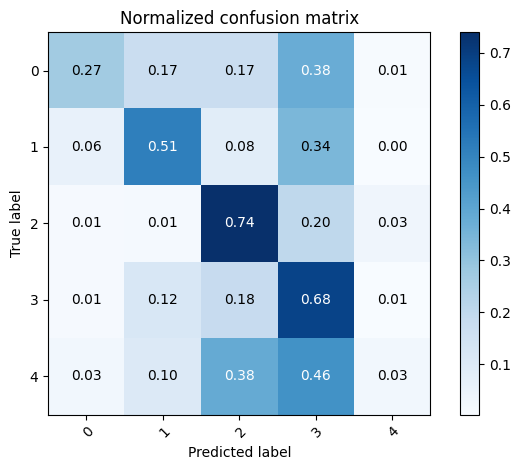

In [5]:
cnn.load(name="new")
trained = Trainer(cnn, dataset)
trained.evaluate()

In [6]:
car_env.play(cnn)

578.4006734006582
True


: 